## Heart Failure Prediction:
Nancy Akoum 202200112
<br>Mohammad Al Izzi 202104792


## Introduction:
In response to the global challenge of cardiovascular diseases and heart failure, this machine learning initiative employs a systematic approach:

1. Data Analysis and Visualization:
   Explore and visualize medical data to reveal patterns and insights.

2. Data Preprocessing:
   Cleanse and organize data to ensure its quality and relevance.

3. Choosing Models:
   Select appropriate machine learning models based on the complexity of heart failure.

4. Training the Models:
   Iteratively train models with preprocessed data to learn patterns indicative of heart failure.

5. Evaluating the Models:
   Assess model performance using metrics like accuracy and precision.

6. Tuning the Parameters:
   Fine-tune model parameters for optimal performance, striking a balance between accuracy and generalization.

This holistic process aims to automate heart failure detection, showcasing the potential of AI in healthcare for proactive disease management.

## 1.Data Analysis and Visualization:
we got our dataset from <a src="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">Heart Failure Prediction | Kaggle</a>
<br>To begin with, we have brought in the numpy and pandas libraries. Following that, we have also imported the matplotlib library, which is a comprehensive library that aids in creating interactive visualizations using Python. The subsequent step involves constructing a dataframe.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data= pd.read_csv('heart.csv')

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


First, we are going to check the number of instances and attributes as well as the datatypes.

In [3]:
print("Number of instances are:", len(data))
print("Number of attributes are:", len(data.columns))
print("Information of the attributes:")
pd.set_option('display.max_rows', None)
print(data.info())

Number of instances are: 918
Number of attributes are: 12
Information of the attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [4]:
 #Function for determining the number and percentages of missing values

def missing (data):
    missing_number = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

As you can see in the below table as well as the followed heap that our there is no missing values in our data set.

In [5]:
missing (data)


,Missing_Number,Missing_Percent
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


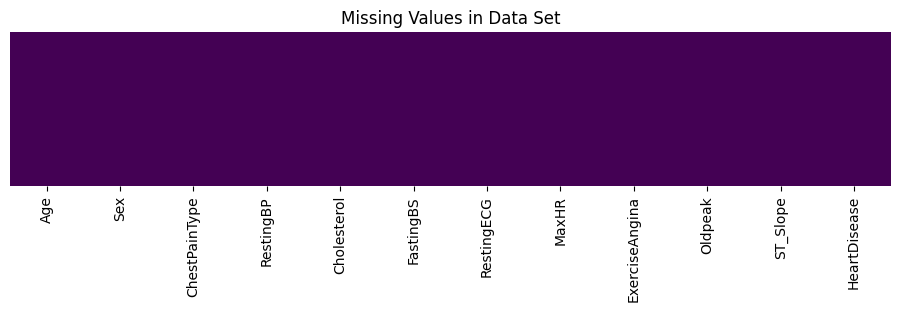

In [6]:

# Set the figure size for better visualization
plt.figure(figsize=(25, 2))

# Subplot 1: Display a heatmap to visualize missing values in the dataset
plt.subplot(1, 2, 1)
plt.title("Missing Values in Data Set")

# Create a heatmap to visualize missing values
# White lines indicate missing values (True values in the dataset)
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Show the plot
plt.show()


In [7]:
data[data['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


mean (average):
<br>Lighter colors represent lower values.
<br>Darker colors represent higher values.
<br>std (standard deviation):
<br>Lighter colors represent lower standard deviation.
<br>Darker colors represent higher standard deviation.
<br>50% (median):
<br>Lighter colors represent lower median values.
<br>Darker colors represent higher median values.
<br>count:
<br>Lighter colors represent lower counts.
<br>Darker colors represent higher counts.
<br>The 'RdPu' colormap transitions from red to purple. In general, the color intensity increases as the value of the corresponding summary statistic increases.
<br>Red: Low values
<br>Purple: High values
<br>So, when you visualize the DataFrame with the applied background gradient, you will see a color spectrum for these summary statistics, making it easier to identify trends or variations in the data. Lighter colors typically indicate lower values, while darker colors indicate higher values.

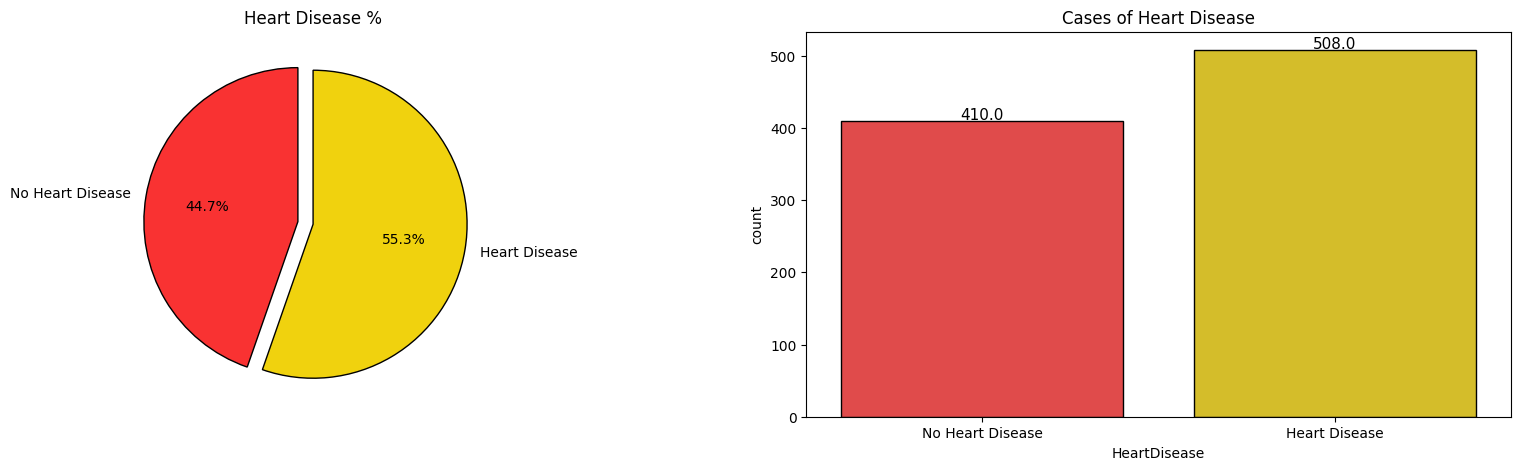

In [8]:
l = list(data['HeartDisease'].value_counts())
colors = ['#F93232', '#F0D20E']
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %');

plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show();

As you can see, the data set is much evenly balanced!

Now, In order to visualize the correlation between features, we are going to use a heatmap. This will help us identify features that are highly correlated with each other, which may impact the performance of our models.

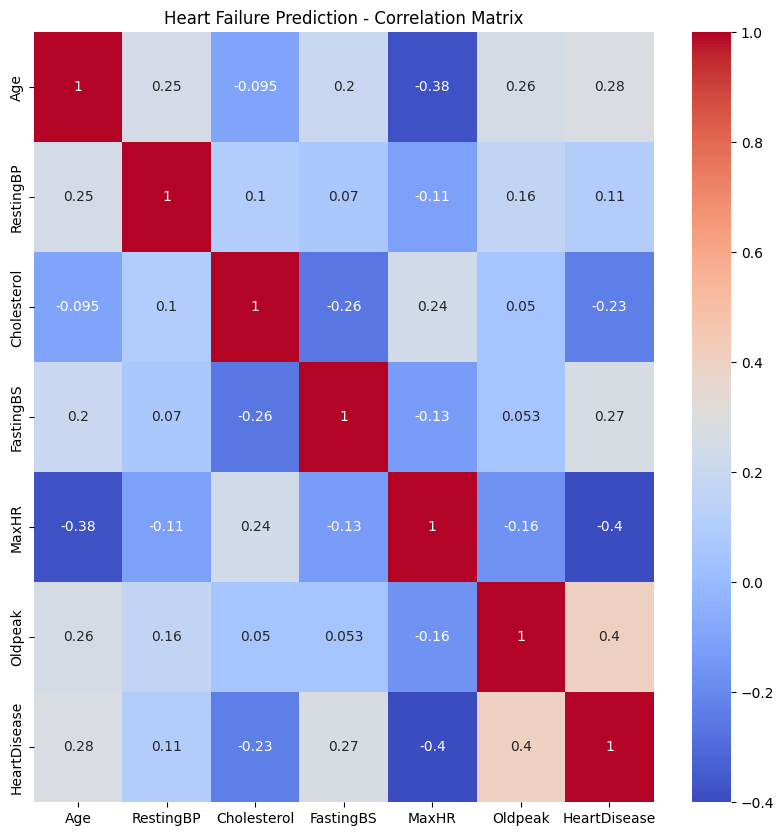

In [9]:
# calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# set the title
plt.title('Heart Failure Prediction - Correlation Matrix')

plt.show()

## 2.Data Preprocessing:
In order to ensure consistency in the representation of categorical variables, they were replaced with numerical values. This ensures better compatibility with machine learning algorithms and analysis.

In [10]:
# Replace 'M' with 0 and 'F' with 1 in the 'Sex' column for consistency
data['Sex'] = data['Sex'].replace({'M': 0, 'F': 1})

# Replace ChestPainType categories with numerical values (TA:0, ATA:1, NAP:2, ASY:3) for consistency
data['ChestPainType'] = data['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3})

# Replace RestingECG categories with numerical values (Normal:0, ST:1, LVH:2) for consistency
data['RestingECG'] = data['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2})

# Replace 'N' with 0 and 'Y' with 1 in the 'ExerciseAngina' column for consistency
data['ExerciseAngina'] = data['ExerciseAngina'].replace({'N': 0, 'Y': 1})

# Replace ST_Slope categories with numerical values (Up:0, Flat:1, Down:2) for consistency
data['ST_Slope'] = data['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2})


Find below the updated version of the dataset (after dropping the index and patient ID columns and replacing the Level attribute by numerical values.



In [11]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


In [12]:
# attribute information after modifications
print("Attribute information:")
print(data.dtypes)
#All are numerical values now

Attribute information:
Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object


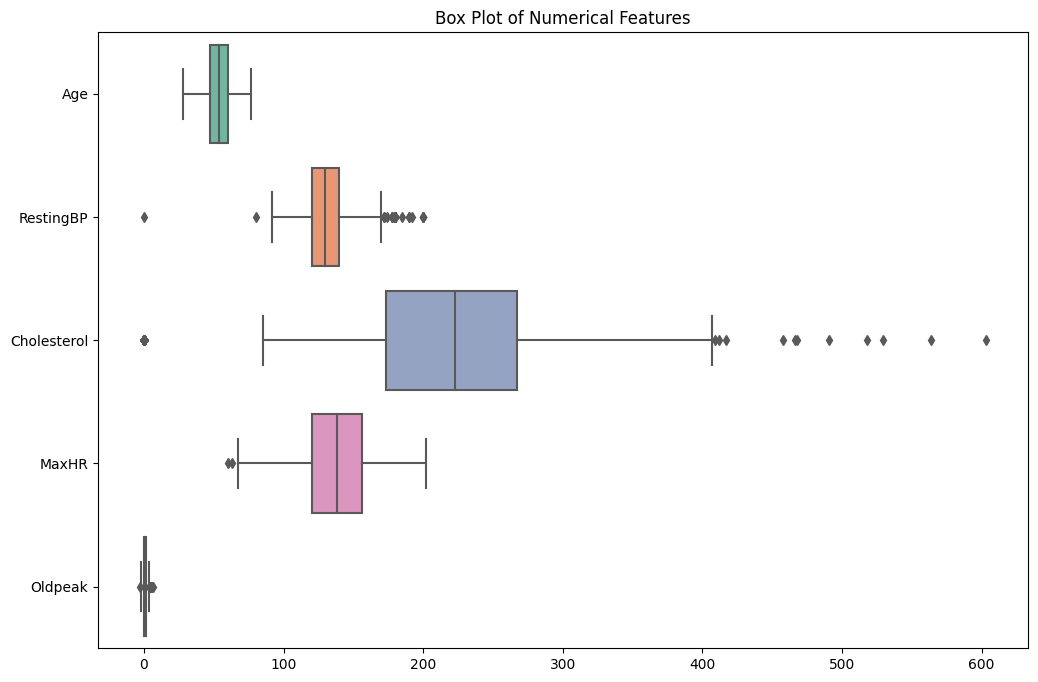

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your_data is your preprocessed dataset with the numerical features
# and Oldpeak has been normalized

# Select relevant numerical features for box plotting
numerical_features_for_boxplot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a dataframe for the box plot
boxplot_data = data[numerical_features_for_boxplot]

# Create a box plot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=boxplot_data, orient='h', palette='Set2')
plt.title('Box Plot of Numerical Features')
plt.show()


In [14]:
# Calculate outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Count number of outliers per column
num_outliers = outliers.sum(axis=0)

# Print number of outliers per column
print(num_outliers)

Age                 0
Sex               193
ChestPainType      46
RestingBP          28
Cholesterol       183
FastingBS         214
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
HeartDisease        0
dtype: int64


When a column is skewed, it means that the mean is influenced by the extreme values, and replacing outliers with the mean will not be a good representation of the central tendency. In such cases, replacing outliers with the median is a better option because it is a robust measure of central tendency and is not affected by the extreme values. However, if the column is not skewed, replacing outliers with the mean is a good option because it provides a good representation of the central tendency. The median can still be used, but the mean is preferred because it takes into account all the values in the column.

In [15]:


# Set threshold for skewness
threshold = 0.5

for column in data.columns[:-1]:
    # Calculate skewness
    skewness = skew(data[column])

    # Check if column is skewed or not
    if skewness > threshold:
        skew_type = "positively skewed"
    elif skewness < -threshold:
        skew_type = "negatively skewed"
    else:
        skew_type = "not skewed"

    # Print skewness value and skewness type
    print(f"column {column} skewness: {skewness} ({skew_type})")

    # Replace outliers based on skewness
    if skewness > threshold:
        median = np.median(data[column])
        data[column] = np.where((data[column] < (data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))) | (data[column] > (data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))), median, data[column])
        print(f"Outliers replaced with median ({median}) in column {column}")
    elif skewness < -threshold:
        median = np.median(data[column])
        data[column] = np.where((data[column] < (data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))) | (data[column] > (data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))), median, data[column])
        print(f"Outliers replaced with median ({median}) in column {column}")
    else:
        mean = np.mean(data[column])
        data[column] = np.where((data[column] < (data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))) | (data[column] > (data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)))), mean, data[column])
        print(f"Outliers replaced with mean ({mean}) in column {column}")


column Age skewness: -0.19561273124487544 (not skewed)
Outliers replaced with mean (53.510893246187365) in column Age
column Sex skewness: 1.4222108073311597 (positively skewed)
Outliers replaced with median (0.0) in column Sex
column ChestPainType skewness: -0.8918809499254284 (negatively skewed)
Outliers replaced with median (3.0) in column ChestPainType
column RestingBP skewness: 0.17954532149156327 (not skewed)
Outliers replaced with mean (132.39651416122004) in column RestingBP
column Cholesterol skewness: -0.6090891046626045 (negatively skewed)
Outliers replaced with median (223.0) in column Cholesterol
column FastingBS skewness: 1.2624170859488144 (positively skewed)
Outliers replaced with median (0.0) in column FastingBS
column RestingECG skewness: 0.8373883413287264 (positively skewed)
Outliers replaced with median (0.0) in column RestingECG
column MaxHR skewness: -0.14412342991429325 (not skewed)
Outliers replaced with mean (136.80936819172112) in column MaxHR
column Exercise

In [16]:
print("Outliers above:")
print(Q3 + 1.5 * IQR)

Outliers above:
Age                79.500
Sex                 0.000
ChestPainType       4.500
RestingBP         170.000
Cholesterol       407.625
FastingBS           0.000
RestingECG          2.500
MaxHR             210.000
ExerciseAngina      2.500
Oldpeak             3.750
ST_Slope            2.500
HeartDisease        2.500
dtype: float64


## 3.Choosing a Model
We are unsure about which algorithms will perform best on this dataset, so we will train several different models on our data. We will evaluate the algorithms by comparing them. As we compute, we will display the testing accuracy and training accuracy of each model. We'll pick a set of various algorithms that can handle this classification issue. Three alogorithms were selected
<br> Logistic Regression
<br> K-Nearest Neighbors
<br> Naive bayes


# 4&5. Training the models and evaluating them:


In [17]:
X = data.drop(columns=data.columns[11], axis=1)
Y = data["HeartDisease"]

## Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


Training and evaluating the Logistic Regression model:

We trained the model with Logistic regression:
***********************************
Test size: 0.3
***********************************

To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


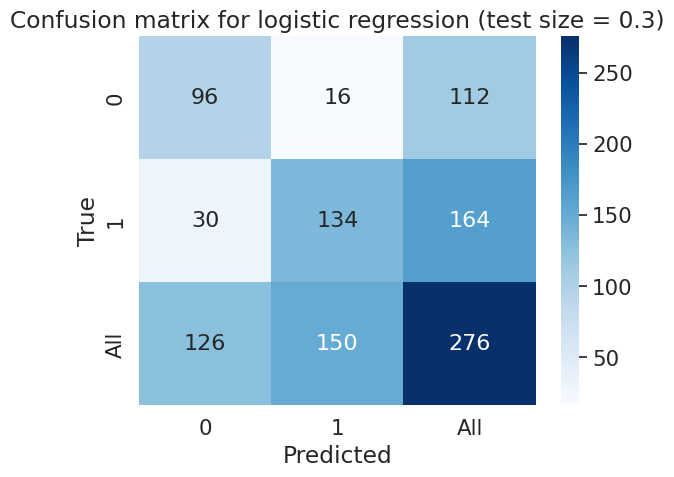

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8333333333333334
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[ 96  16]
 [ 30 134]]
-------------------------------------------------------------------------
The Classification Report is: ---->>
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276

***********************************
Test size: 0.2
***********************************

To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


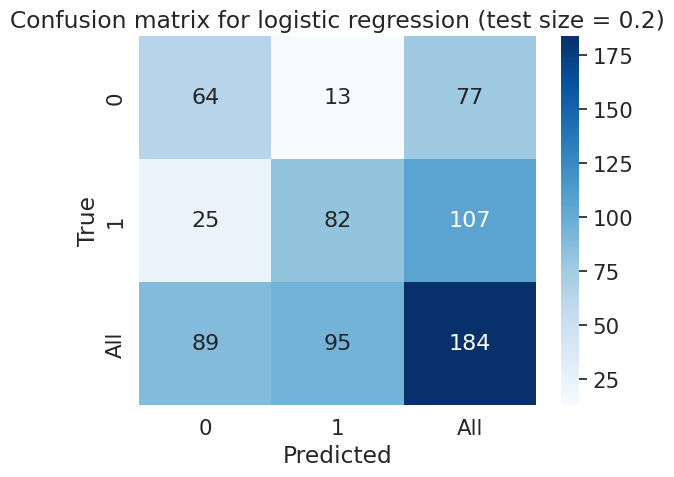

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.7934782608695652
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[64 13]
 [25 82]]
-------------------------------------------------------------------------
The Classification Report is: ---->>
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        77
           1       0.86      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.79       184

***********************************
Test size: 0.1
***********************************

To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


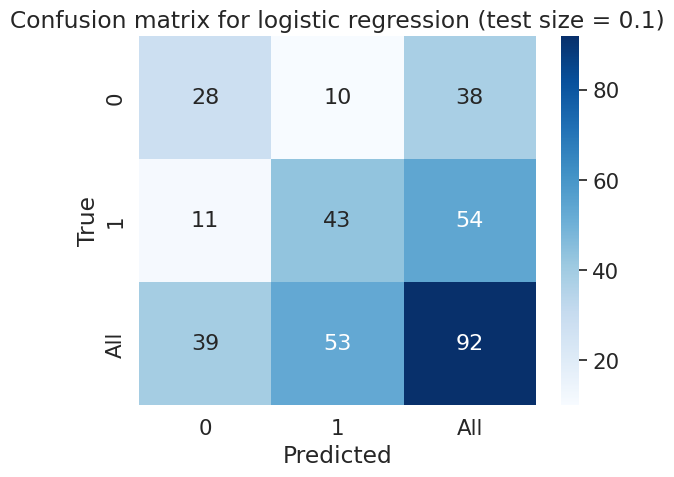

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.7717391304347826
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[28 10]
 [11 43]]
-------------------------------------------------------------------------
The Classification Report is: ---->>
               precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.80      0.80        54

    accuracy                           0.77        92
   macro avg       0.76      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



In [19]:
# Define the different test sizes we want to use
test_sizes = [0.3, 0.2, 0.1]

# Train and evaluate the logistic regression model
print("\nTraining and evaluating the Logistic Regression model:\n")
print("We trained the model with Logistic regression:")

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size)
    print("***********************************\n")

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)


    model = LogisticRegression()
    model.fit(X_train,y_train)
    testing_accuracy_LR = model.score(X_test,y_test)

    # Generate and display confusion matrix for logistic regression
    print("To gain a deeper understanding of the model, confusion matrix can be further seen to understand true positive, false positive, true negative, and false negative.")
    prediction = model.predict(X_test)
    cm = pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)
    sns.set(font_scale=1.4)
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues')
    plt.title('Confusion matrix for logistic regression (test size = {})'.format(test_size))
    plt.show()

    y_pred = model.predict(X_test)

    print("-------------------------------------------------------------------------")
    print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
    print("-------------------------------------------------------------------------")
    print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
    print("-------------------------------------------------------------------------")
    print(f"The Classification Report is: ---->>\n {classification_report(y_test,y_pred)}")


## KNN


Training and evaluating k-NN classifier for different numbers of neighbors:

To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 16).
We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.

We fit kNN classifier to the training data.

***********************************
Test size: 0.3
***********************************

Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


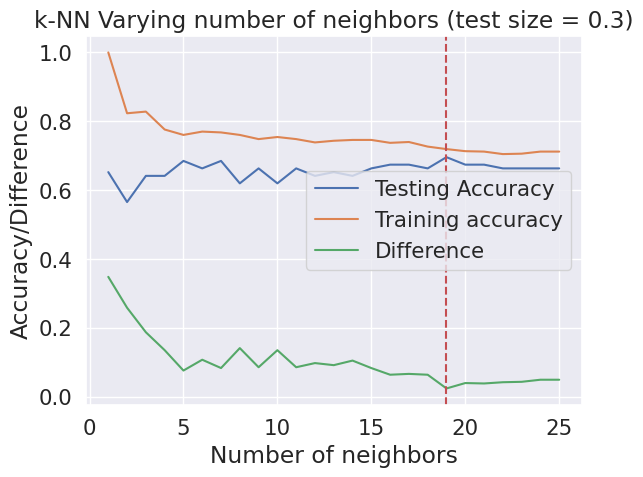

The best value of k is: 19
We will calculate the testing accuracy of the k-NN model:
For test size: 0.3 , the k-NN testing accuracy is: 0.70
The accuracy score of the k-NN was 0.70 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


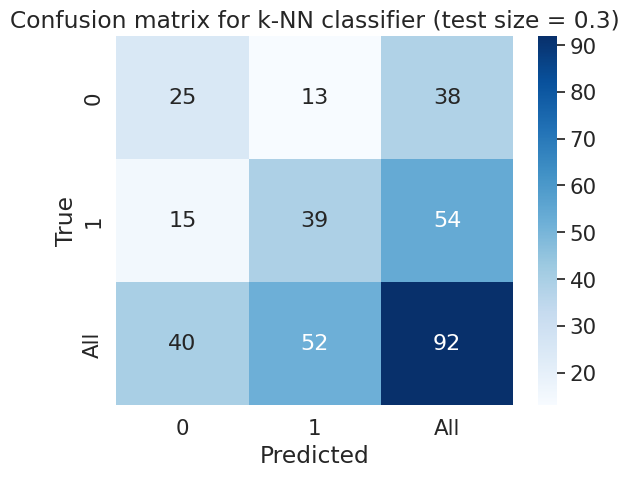

***********************************
Test size: 0.2
***********************************

Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


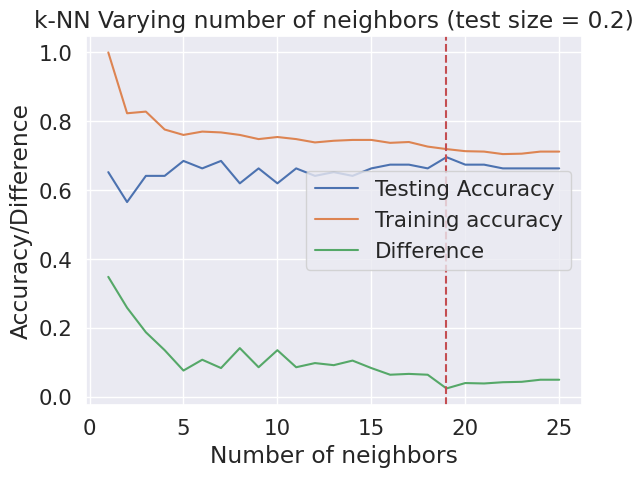

The best value of k is: 19
We will calculate the testing accuracy of the k-NN model:
For test size: 0.2 , the k-NN testing accuracy is: 0.70
The accuracy score of the k-NN was 0.70 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


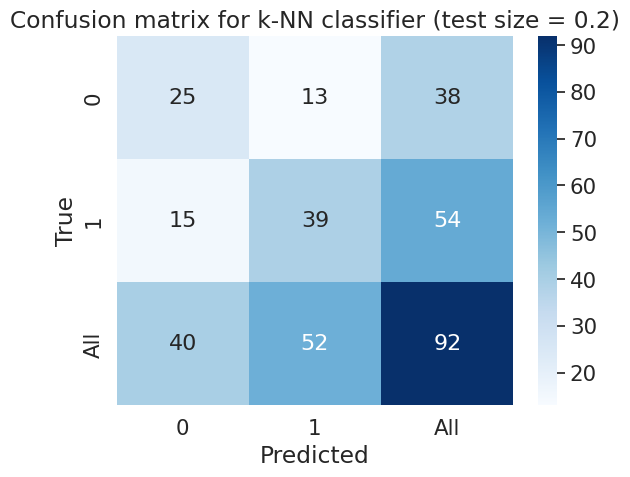

***********************************
Test size: 0.1
***********************************

Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.


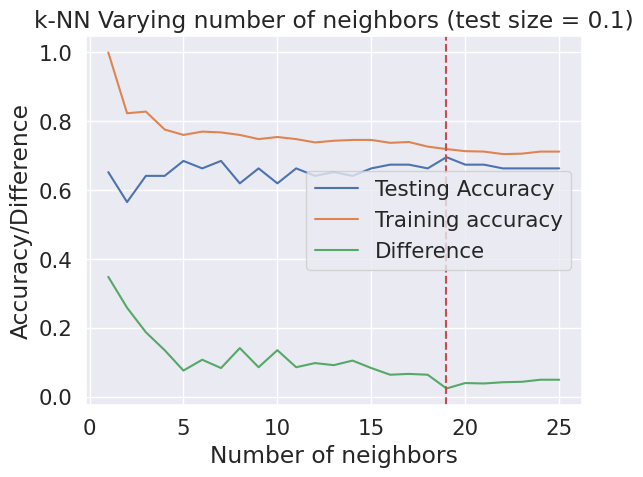

The best value of k is: 19
We will calculate the testing accuracy of the k-NN model:
For test size: 0.1 , the k-NN testing accuracy is: 0.70
The accuracy score of the k-NN was 0.70 . To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:


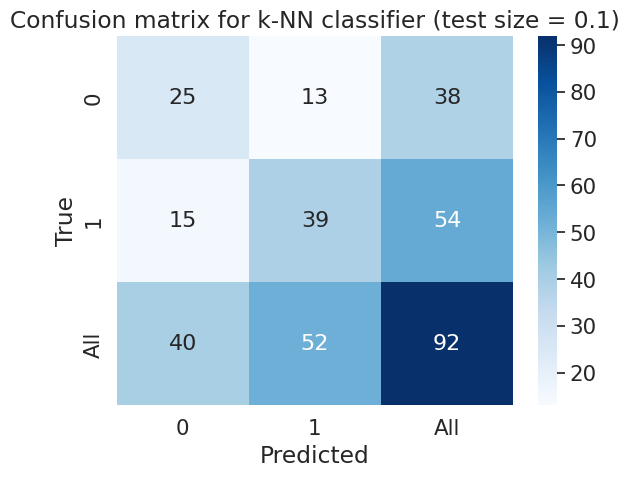

In [20]:
test_sizes = [0.3, 0.2, 0.1]

print("\nTraining and evaluating k-NN classifier for different numbers of neighbors:\n")
print("To know the most suitable number of neighbors, we will test the k-NN model on different numbers (from 1 till 16).")
print("We want to find the value of k with the highest testing and training accuracy while keeping the difference between them small so that we do not fall in overfitting or underfitting.")
print("\nWe fit kNN classifier to the training data.\n")

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size)
    print("***********************************\n")

    # Train and evaluate k-NN classifier for different numbers of neighbors
    neighbors = np.arange(1,26)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    diff_accuracy = np.empty(len(neighbors))

    for i, k in enumerate(neighbors):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy[i] = knn.score(X_train, y_train)
        test_accuracy[i] = knn.score(X_test, y_test)
        diff_accuracy[i] = abs(train_accuracy[i] - test_accuracy[i])

    # Find the index of k with the highest testing accuracy and the smallest difference between testing and training accuracy
    print("Now, we will plot the number of neighbors against accuracy to select the most suited number of neighbors.")
    best_k_index = np.argmax(test_accuracy - diff_accuracy)
    best_k = neighbors[best_k_index]

    plt.title('k-NN Varying number of neighbors (test size = {})'.format(test_size))
    plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
    plt.plot(neighbors, train_accuracy, label='Training accuracy')
    plt.plot(neighbors, diff_accuracy, label='Difference')

    plt.legend()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy/Difference')
    plt.axvline(x=best_k, color='r', linestyle='--')
    plt.show()
    print("The best value of k is:", best_k)


    # Generate and display confusion matrix for k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("We will calculate the testing accuracy of the k-NN model:")
    test_accuracy_KNN= knn.score(X_test,y_test)
    print("For test size:", test_size, ", the k-NN testing accuracy is:", "{:.2f}".format(test_accuracy_KNN) )
    print("The accuracy score of the k-NN was",  "{:.2f}".format(test_accuracy_KNN), ". To gain a deeper understanding of the model, a confusion matrix through frequency tables can be seen:")

    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, fmt='g', cmap="Blues")
    plt.title('Confusion matrix for k-NN classifier (test size = {})'.format(test_size))
    plt.show()

As it can be seen, before tuning the parameters we had the following:

<table>
    <thead>
        <tr>
            <th></th>
            <th>LR testing accuracy</th>
            <th>k-NN testing accuracy</th>
        </tr>
    </thead>
    <tbody>
    <tr>
      <td>30% testing</td>
      <td>0.883</td>
      <td>0.7</td>
    </tr>
    <tr>
      <td>20% testing</td>
      <td>0.79</td>
      <td>0.7</td>
    </tr>
    <tr>
      <td>10% testing</td>
      <td>0.77</td>
      <td>0.7</td>
    </tr>
    </tbody>
</table>

Best model: Logistic regression with 30% test size

## Naive Bayes

In [21]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

# Assuming X and Y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Initialize the Bernoulli Naive Bayes model
model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [22]:
X_train.dtypes

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

#all of our data is numerical

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [23]:
X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [24]:
X_test.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [25]:
# Feature Scaling
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

#We now have X_train dataset ready to be fed into the BernoulliNB Naive Bayes classifier. I will do it as follows.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.153846,0.0,-1.0,0.35,-0.30,0.0,1.0,-0.444444,1.0,0.866667,0.0
1,-0.615385,0.0,-2.0,0.50,1.04,0.0,0.0,0.750000,1.0,-0.333333,-1.0
2,-1.153846,0.0,-2.0,-0.50,-0.46,0.0,0.0,0.611111,1.0,0.333333,0.0
3,0.076923,0.0,-2.0,0.50,-0.54,0.0,0.0,0.333333,0.0,-0.333333,-1.0
4,-0.846154,0.0,0.0,-0.75,0.00,0.0,0.0,0.194444,1.0,1.000000,0.0


In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Instantiate the Bernoulli Naive Bayes model
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Calculate and print the accuracy score on the test set
print('Model accuracy score on test set: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

# Make predictions on the training set
y_pred_train = bnb.predict(X_train)

# Calculate and print the accuracy score on the training set
print('Model accuracy score on training set: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))


Model accuracy score on test set: 0.6848
Model accuracy score on training set: 0.7676


In [27]:
y_test.value_counts()

1    54
0    38
Name: HeartDisease, dtype: int64

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[25 13]
 [16 38]]

True Positives(TP) =  25

True Negatives(TN) =  38

False Positives(FP) =  13

False Negatives(FN) =  16


<Axes: >

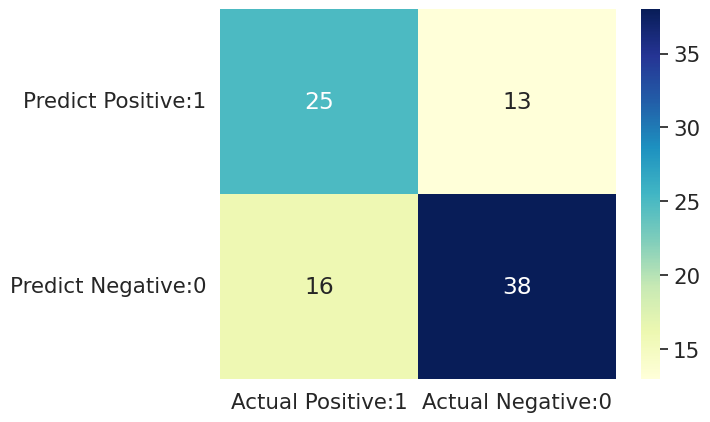

In [29]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63        38
           1       0.75      0.70      0.72        54

    accuracy                           0.68        92
   macro avg       0.68      0.68      0.68        92
weighted avg       0.69      0.68      0.69        92



In [31]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6848


In [32]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3152


In [33]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.6579


Text(0, 0.5, 'Frequency')

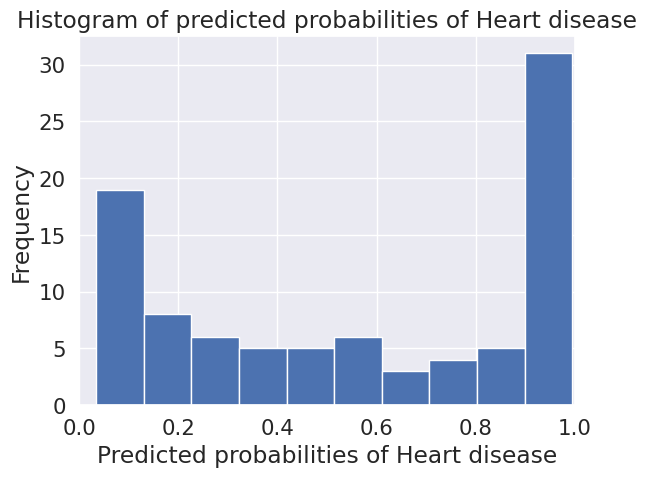

In [34]:
bnb.predict_proba(X_test)[0:10, 1]

y_pred1 = bnb.predict_proba(X_test)[:, 1]

# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Heart disease')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Heart disease')
plt.ylabel('Frequency')

## ROC
Another tool to measure the classification model performance visually is ROC Curve. ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).

In [35]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

True Positive Rate : 0.6098
False Positive Rate : 0.2549


<ipython-input-36-632a1fed9476>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-36-632a1fed9476>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-36-632a1fed9476>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-36-632a1fed9476>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-36-632a1fed9476>:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


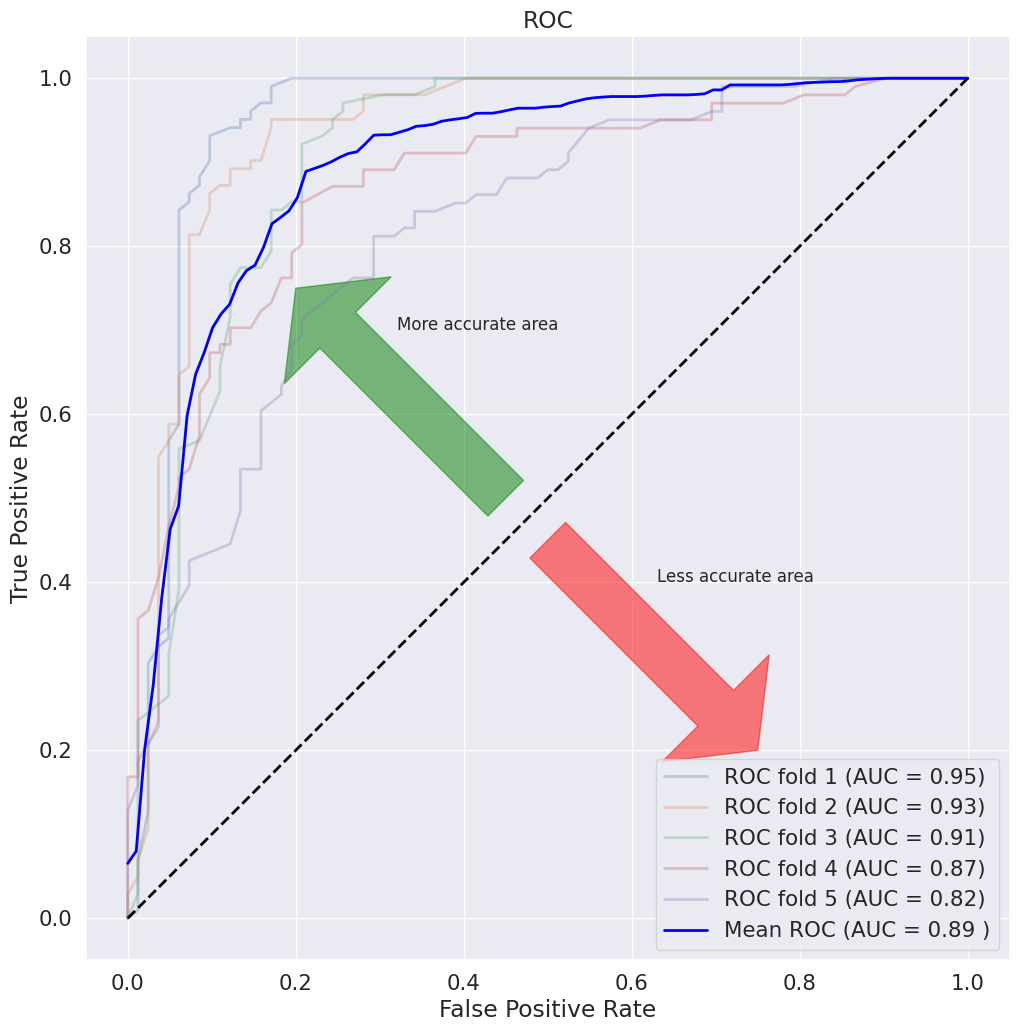

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from scipy import interp

x = data.loc[:, data.columns != 'HeartDisease']
y = data.loc[:,'HeartDisease']

random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)

# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

# 6. Tuning the Parameters

In [37]:
#Logistic Regression

print("Tuning Logistic Regression Parameters\n\n")

# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
hyperparameters = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2'],
    'C': [0.1, 1, 10],
    'max_iter': [5000]
}

test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size)
    print("***********************************\n")

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Create a logistic regression model
    logreg = LogisticRegression()

    # Use GridSearchCV to find the best hyperparameters
    clf = GridSearchCV(logreg, hyperparameters, cv=5)
    clf.fit(X_train, y_train)

    # Print the best hyperparameters
    print('Best parameters:', clf.best_params_)

    # Train a new model with the best hyperparameters
    best_logreg = LogisticRegression(**clf.best_params_)
    best_logreg.fit(X_train, y_train)

    # Evaluate the final model on the testing set
    score = best_logreg.score(X_test, y_test)
    print('Accuracy:', "{:.2f}".format(score))


Tuning Logistic Regression Parameters


***********************************
Test size: 0.3
***********************************

Best parameters: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.83
***********************************
Test size: 0.2
***********************************

Best parameters: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.81
***********************************
Test size: 0.1
***********************************

Best parameters: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.78


In [38]:
#KNN

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}

test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    print("***********************************")
    print("Test size:", test_size)
    print("***********************************\n")

    # Define the KNN model
    knn = KNeighborsClassifier()

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Perform grid search using cross-validation
    grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print the best parameters
    print("Best parameters:", grid_search.best_params_)

    # Train a new model with the best parameters
    best_knn = KNeighborsClassifier(**grid_search.best_params_)
    best_knn.fit(X_train, y_train)

    # Evaluate the final model on the testing set
    score = best_knn.score(X_test, y_test)
    print('Testing accuracy:', "{:.2f}".format(score))

***********************************
Test size: 0.3
***********************************

Best parameters: {'n_neighbors': 19, 'weights': 'distance'}
Testing accuracy: 0.67
***********************************
Test size: 0.2
***********************************

Best parameters: {'n_neighbors': 9, 'weights': 'distance'}
Testing accuracy: 0.65
***********************************
Test size: 0.1
***********************************

Best parameters: {'n_neighbors': 13, 'weights': 'distance'}
Testing accuracy: 0.66


As it can be seen, after tuning the parameters we had the following:
KNN did not improve, so we will compare only the Logistic regression progress

<table>
    <thead>
        <tr>
            <th></th>
            <th>Before tuning</th>
            <th>After tuning</th>
        </tr>
    </thead>
    <tbody>
    <tr>
      <td>30% testing</td>
      <td>0.883</td>
      <td>0.833</td>
    </tr>
    <tr>
      <td>20% testing</td>
      <td>0.79</td>
      <td>0.81</td>
    </tr>
    <tr>
      <td>10% testing</td>
      <td>0.77</td>
      <td>0.78</td>
    </tr>
    </tbody>
</table>

Best model: Logistic regression with 30% test size

# 7. Making Predictions

To make predictions on the new inhanced models, we will use the LR model with 30% testing data size as it gave the highest testing accuracy among all the logistic regression models and the other models.
We will provide the models with the best parameters that we got while tuning the parameters.
We will make prediction on the first value of the testing data set shown below:

In [39]:
print("Making predictions using LR with 30% testing data and best parameters for the model:")

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# create a logistic regression model with specific hyperparameters
logreg = LogisticRegression(C=1, max_iter=5000, penalty='l2', solver='liblinear')

# fit the model to the training data
logreg.fit(X_train, y_train)

input_data= (65, 0, 3, 160, 223, 0, 1, 122, 0, 1.2, 1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction[0])
if(prediction[0] == 0):
    print("Normal patient")
else:
    print("Heart diseased patient")

Making predictions using LR with 30% testing data and best parameters for the model:
1
Heart diseased patient


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


To see if our predictions are true, we will print its value in the y_test set:

In [40]:
print(y_test.iloc[2])

1


It is truee :)